In [1]:
import os
import csv

cwd = os.getcwd()
DATA_PATH = '/kik_knet_data'
ALL_DATA_PATH = f'{DATA_PATH}/all_data'
RAW_DATA_PATH = f'{ALL_DATA_PATH}/selecteddata'


attrs = [
    'origin_time', 'latitude', 'longitude', 'depth', 'magnitude',
    'station_code', 'station_latitude', 'station_longitude', 'station_height',
    'record_time', 'sampling_frequency', 'duration_time', 'channel_number',
    'scale_factor', 'max_acceleration', 'last_correction'
]
time_attrs = ['origin_time', 'record_time', 'duration_time', 'last_correction']

def get_file_data(file_path):
    result = {}
    line_number = 0
    strong_motion_data = []
    with open(file_path) as f:
        line = f.readline()
        while line:
            line = line.replace('\n', '')
            splitted_line = line.split(' ')
            if line_number <  len(attrs):
                attr = attrs[line_number]
                if attr in time_attrs:
                    result[attr] = f'{splitted_line[-2]} {splitted_line[-1]}'
                else:
                    result[attr] = f'{splitted_line[-1]}'
            elif ('Memo.' not in line) and line_number >= len(attr):
                for data in splitted_line:
                    if not data: continue
                    strong_motion_data.append(data)

            line = f.readline()
            line_number += 1
        result['strong_motion_data'] = ','.join(strong_motion_data)
        # result['strong_motion_data'] = strong_motion_data
    return result

def create_csv(path, fields, all_rows):
    with open(cwd + path, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fields)
        writer.writeheader()
        for data in all_rows:
            writer.writerow(data)

def create_csvs():
    all_rows = []
    strong_motion_data = []
    for path, directories, files in os.walk(cwd + RAW_DATA_PATH):
        for file in files:
            if 'ps' not in file:
                file_path = f'{path}/{file}'
                file_data = get_file_data(file_path)
                scale_factor = (file_data['scale_factor']).split('(gal)/')
                scale_factor = int(scale_factor[0])/int(scale_factor[1])
                strong_motion_data.append({
                    'strong_motion_data': file_data['strong_motion_data'],
                    'scale_factor': scale_factor
                })
                del file_data['strong_motion_data']
                all_rows.append(file_data)

    kik_knet_path = f'{ALL_DATA_PATH}/kik_knet.csv'
    create_csv(kik_knet_path, attrs, all_rows)

    strong_motion_path = f'{ALL_DATA_PATH}/kik_knet_strong_motion.csv'
    create_csv(
        strong_motion_path,
        ['strong_motion_data', 'scale_factor'],
        strong_motion_data
    )

# create_csvs()

In [2]:
import pandas as pd

def load_kiknet_data(csv_path):
    print(csv_path)
    return pd.read_csv(csv_path)

In [3]:
earthquake = load_kiknet_data(f'{cwd}{ALL_DATA_PATH}/kik_knet.csv')
earthquake.head()

/home/adebowale/code/proj/kik_knet_data/all_data/kik_knet.csv


,origin_time,latitude,longitude,depth,magnitude,station_code,station_latitude,station_longitude,station_height,record_time,sampling_frequency,duration_time,channel_number,scale_factor,max_acceleration,last_correction
0,2007/03/25 09:42:00,37.220,136.685,11,6.9,ISK004,37.3080,137.1471,9.0,2007/03/25 09:42:06,100Hz,205,E-W,3920(gal)/6182761,588.811,2007/03/25 09:41:51
1,2007/03/25 09:42:00,37.220,136.685,11,6.9,ISK004,37.3080,137.1471,9.0,2007/03/25 09:42:06,100Hz,205,N-S,3920(gal)/6182761,622.189,2007/03/25 09:41:51
2,2007/03/25 09:42:00,37.220,136.685,11,6.9,ISK004,37.3080,137.1471,9.0,2007/03/25 09:42:06,100Hz,205,U-D,3920(gal)/6182761,146.877,2007/03/25 09:41:51
3,2016/04/16 01:25:00,32.753,130.762,12,7.3,KMM009,32.6858,130.9856,443.0,2016/04/16 01:25:10,100Hz,300,E-W,3920(gal)/6182761,639.537,2016/04/16 01:25:10
4,2016/04/16 01:25:00,32.753,130.762,12,7.3,KMM009,32.6858,130.9856,443.0,2016/04/16 01:25:10,100Hz,300,U-D,3920(gal)/6182761,186.616,2016/04/16 01:25:10


In [4]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   origin_time         660 non-null    object 
 1   latitude            660 non-null    float64
 2   longitude           660 non-null    float64
 3   depth               660 non-null    int64  
 4   magnitude           660 non-null    float64
 5   station_code        660 non-null    object 
 6   station_latitude    660 non-null    float64
 7   station_longitude   660 non-null    float64
 8   station_height      660 non-null    float64
 9   record_time         660 non-null    object 
 10  sampling_frequency  660 non-null    object 
 11  duration_time       660 non-null    int64  
 12  channel_number      660 non-null    object 
 13  scale_factor        660 non-null    object 
 14  max_acceleration    660 non-null    float64
 15  last_correction     660 non-null    object 
dtypes: float

In [5]:
# 111 stations
earthquake["station_code"].value_counts()

IBRH13    48
KMMH16    24
IWTH25    24
IBRH14    18
NIGH01    18
          ..
MYG004     3
KMM004     3
ISK006     3
SMN003     3
TKY008     3
Name: station_code, Length: 111, dtype: int64

In [6]:
earthquake["sampling_frequency"].value_counts()

100Hz    540
200Hz    120
Name: sampling_frequency, dtype: int64

In [7]:
# K-NET: [NS, EW, UD]
# KiK-net: {
#   borehole: [(1, NS1), (2, EW1), (3, UD1)]
#   surface:  [(4, NS2), (5, EW2), (6, UD2)]
# }
earthquake["channel_number"].value_counts()

E-W    80
N-S    80
U-D    80
4      70
2      70
1      70
5      70
6      70
3      70
Name: channel_number, dtype: int64

In [8]:
earthquake["scale_factor"].value_counts()

2000(gal)/8388608    195
3920(gal)/6170801    144
3920(gal)/6182761    135
2940(gal)/6170270    132
7845(gal)/8223790     39
3923(gal)/8224838      9
2942(gal)/8224139      6
Name: scale_factor, dtype: int64

In [9]:
# clean station height and set the missing height (-9999) to nan
earthquake.loc[earthquake['station_height'] == -9999, 'station_height'] = pd.NA
earthquake['station_height'] = pd.to_numeric(earthquake['station_height'], errors='coerce')
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   origin_time         660 non-null    object 
 1   latitude            660 non-null    float64
 2   longitude           660 non-null    float64
 3   depth               660 non-null    int64  
 4   magnitude           660 non-null    float64
 5   station_code        660 non-null    object 
 6   station_latitude    660 non-null    float64
 7   station_longitude   660 non-null    float64
 8   station_height      654 non-null    float64
 9   record_time         660 non-null    object 
 10  sampling_frequency  660 non-null    object 
 11  duration_time       660 non-null    int64  
 12  channel_number      660 non-null    object 
 13  scale_factor        660 non-null    object 
 14  max_acceleration    660 non-null    float64
 15  last_correction     660 non-null    object 
dtypes: float

In [10]:
earthquake.describe()

,latitude,longitude,depth,magnitude,station_latitude,station_longitude,station_height,duration_time,max_acceleration
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,654.000000,660.000000,660.000000
mean,36.878227,138.001245,23.468182,6.271818,36.889952,137.983746,187.740055,229.327273,395.718338
std,2.718758,3.848751,27.069862,0.887406,2.750791,3.826066,243.628076,78.203378,326.441993
min,31.383000,130.620000,3.000000,3.700000,31.374100,130.433300,-197.000000,67.000000,21.144000
25%,34.929250,134.713500,8.000000,5.700000,34.963625,134.672450,35.000000,157.000000,146.828250
50%,36.895000,139.131500,11.000000,6.500000,36.838150,139.103000,86.000000,248.000000,353.382500
75%,38.808000,140.880000,24.000000,7.000000,38.860375,140.863800,330.000000,300.000000,544.772000
max,44.075000,143.110000,108.000000,7.300000,44.148700,143.152000,1150.000000,568.000000,3866.009000


Saving figure attribute_histogram_plots


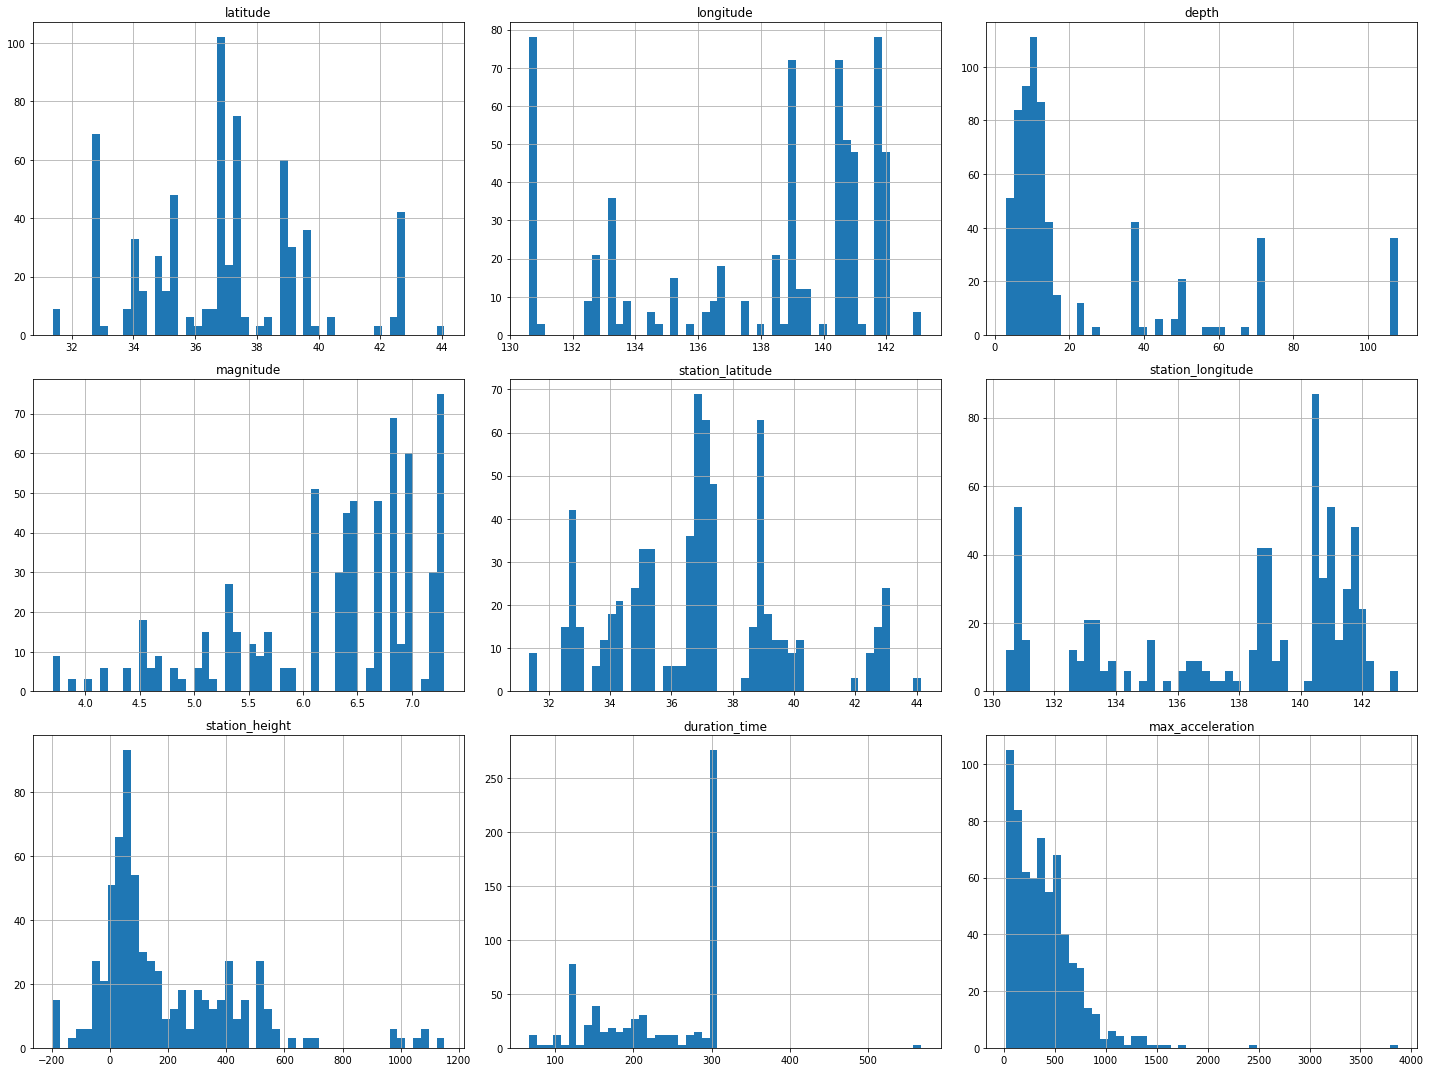

In [11]:
# we can also check the summary by plotting a histogram for all the attrs


# Where to save the figures
PROJECT_ROOT_DIR = "."
NAME = "kik_knet"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", NAME)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

%matplotlib inline
import matplotlib.pyplot as plt
earthquake.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

<AxesSubplot:xlabel='station_longitude', ylabel='station_latitude'>

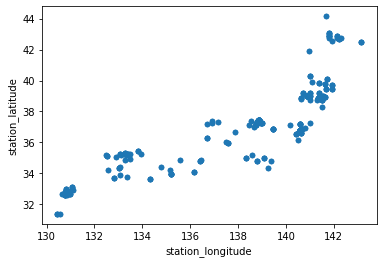

In [71]:
# view geolocation data
earthquake.plot(
    kind="scatter",
    x="station_longitude",
    y="station_latitude",
    alpha=1.0
)

Saving figure magnitude_acceration_scatterplot


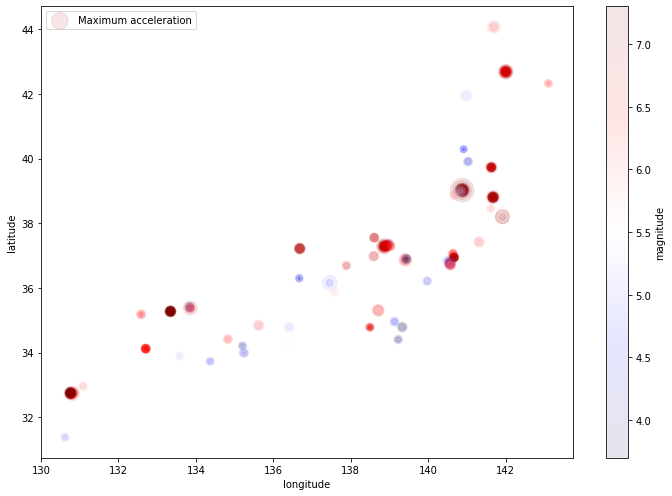

In [35]:
earthquake.plot(
    kind="scatter", x="longitude", y="latitude", alpha=0.1,
    s=earthquake['max_acceleration']/7, label="Maximum acceleration",
    figsize=(10,7), c="magnitude", cmap=plt.get_cmap('seismic'), colorbar=True,
    sharex=False)
plt.legend()
save_fig("magnitude_acceration_scatterplot")

Saving figure japan_magnitude_acceration_scatterplot


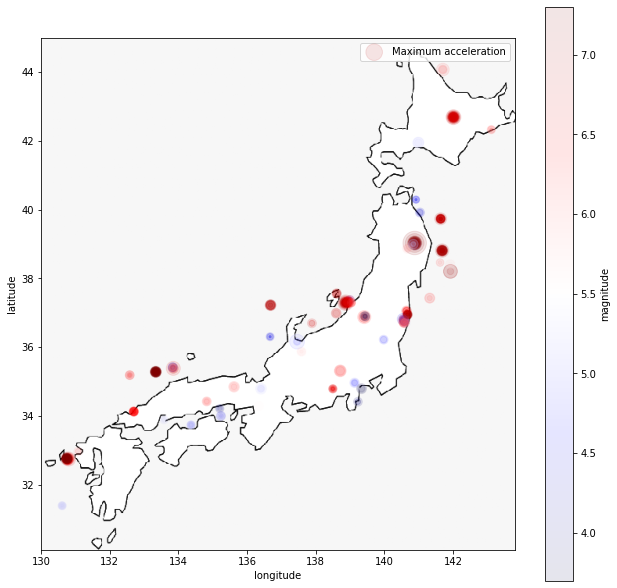

In [74]:
PROJECT_ROOT_DIR = "."
NAME = "kik_knet"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", NAME)
os.makedirs(IMAGES_PATH, exist_ok=True)
filename = 'japan2.png'

import matplotlib.image as mpimg
japan_img=mpimg.imread(os.path.join(IMAGES_PATH, filename))
earthquake.plot(
    kind="scatter", x="longitude", y="latitude", alpha=0.1,
    s=earthquake['max_acceleration']/7, label="Maximum acceleration",
    figsize=(9,8.5), c="magnitude", cmap=plt.get_cmap('seismic'), colorbar=True,
    sharex=False)

plt.imshow(japan_img, extent=[130, 143.8, 30.1, 45], alpha=1.0,
           cmap=plt.get_cmap("seismic"))
plt.legend()
save_fig("japan_magnitude_acceration_scatterplot")